<a href="https://colab.research.google.com/github/mehmet933/Tensorflow-keras/blob/main/Tensorflow_tf_keras_ile_Evri%C5%9Fimli_Sinir_A%C4%9Flar%C4%B1_ve_G%C3%B6r%C3%BCnt%C3%BC_Tan%C4%B1mlama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##### TPU'nun hızlı çalışması için GEREKLİ
import tensorflow as tf
print("Tensorflow versiyonu " + tf.__version__)

try:
  tpu= tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU tespit edildi satırı
  print(' TPU Çalışıyor', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('HATA: TPU çalışma zamanına bağlı değil; lütfen varsa bir önceki hücreye bakın!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
######## TPU'nun stabil ve hızlı çalışması için GEREKLİ

Tensorflow versiyonu 2.6.0
 TPU Çalışıyor ['10.90.97.10:8470']
INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.90.97.10:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.90.97.10:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
#Kütüphaneleri İçeri Aktaralım
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf
 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Giyim eşyalarından oluşan Fashion_Mnist veri setimizi yükleyelim
(egitim_goruntuleri,egitim_etiketleri), (test_goruntuleri, test_etiketleri) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#Eğitim ve test verilerimizin biçimini kontrol edelim
print("Eğitim Görüntülerinin Biçimi:", egitim_goruntuleri.shape, "Eğitim Etiketlerinin Biçimi:", egitim_etiketleri.shape)
print("Test Etiketlerinin Biçimi:", test_goruntuleri.shape, "Test Etiketlerinin Biçimi:", test_etiketleri.shape)

Eğitim Görüntülerinin Biçimi: (60000, 28, 28) Eğitim Etiketlerinin Biçimi: (60000,)
Test Etiketlerinin Biçimi: (10000, 28, 28) Test Etiketlerinin Biçimi: (10000,)


In [ ]:
#Her birinde ne kadar elemana sahibiz
print(egitim_goruntuleri.shape[0], 'Eğitim Kümesi')
print(test_goruntuleri.shape[0], 'Test Kümesi')

60000 Eğitim Kümesi
10000 Test Kümesi


In [ ]:
#Etiket sınıflarımızı oluşturuyoruz 
fashion_mnist_etiketleri = ["Tişört",          # etiket indeksi 0
                        "Pantolon",       # etiket indeksi 1
                        "Kazak",           # etiket indeksi 2 
                        "Elbise",        # etiket indeksi 3 
                        "Ceket",            
                        "Sandalet",         
                        "Gömlek",           
                        "Spor Ayakkabı",         
                        "Çanta",               
                        "Bot"]  


In [ ]:
#Resim görüntüleme işlemi için görüntü indeks değişkeni yaratıp rastgele bir değer atıyoruz
goruntu_indeksi = 3

In [ ]:
#Görüntü indeksi etiket indeksiyle ilişkilendiriliyor
etiket_indeksi = egitim_etiketleri[goruntu_indeksi]

In [ ]:
#Etiketimin indisiyle sınıfını öğreniyoruz
print ("etiket = " + str(etiket_indeksi) + " " +(fashion_mnist_etiketleri[etiket_indeksi]))

etiket = 3 Elbise


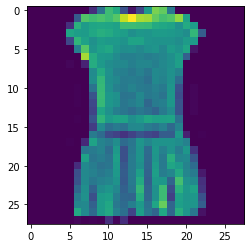

In [ ]:
#Ve görüntülüyoruz
plt.imshow(egitim_goruntuleri[goruntu_indeksi])

In [ ]:
#Sonraki işlemlerde kullanmak üzere görüntülerimizin piksel değeri 0-1 aralığında olsun istiyoruz, ör 2/255, 255/255 gibi düşünün
egitim_goruntuleri = egitim_goruntuleri.astype('float32') / 255
test_goruntuleri = test_goruntuleri.astype('float32') / 255

In [ ]:
#Son bir kontrol yapıp
print("Egitim Verilerinin Sayısı - " + str(len(egitim_goruntuleri)))
print("Test Verilerinin Sayısı - " + str(len(test_goruntuleri)))

Egitim Verilerinin Sayısı - 60000
Test Verilerinin Sayısı - 10000


In [ ]:
# Eğitim verilerimizden 5000 örneği doğrulama kümesine ayırıyoruz
(egitim_goruntuleri, dogrulama_goruntuleri) = egitim_goruntuleri[5000:], egitim_goruntuleri[:5000] 
(egitim_etiketleri, dogrulama_etiketleri) = egitim_etiketleri[5000:], egitim_etiketleri[:5000]

In [ ]:
#Yeniden biçimlendirme için gerekli tanımlamaları yapıyor, gri tonlamalı görüntülerle çalıştığımızdan g ve y e 1 değerini de ekliyoruz
genislik, yukseklik = 28, 28
egitim_goruntuleri = egitim_goruntuleri.reshape(egitim_goruntuleri.shape[0], genislik, yukseklik, 1)
dogrulama_goruntuleri = dogrulama_goruntuleri.reshape(dogrulama_goruntuleri.shape[0], genislik, yukseklik, 1)
test_goruntuleri = test_goruntuleri.reshape(test_goruntuleri.shape[0], genislik, yukseklik, 1)

In [ ]:
#one-hot kodlama
egitim_etiketleri = tf.keras.utils.to_categorical(egitim_etiketleri, 10)
dogrulama_etiketleri = tf.keras.utils.to_categorical(dogrulama_etiketleri, 10)
test_etiketleri = tf.keras.utils.to_categorical(test_etiketleri, 10)

In [ ]:
#Test kümemizi referans alırsak başlangıçta (10000, 28, 28) biçimimiz (10000, 28, 28, 1) olmuş, ve eğitim kümesinin 5 bin örneği doğrulamaya ayrılmış
print("Egitim Görüntülerinin Biçimi:",egitim_goruntuleri.shape, "Eğitim Etiketlerinin Biçimi:", egitim_etiketleri.shape)
print("Değerlendirme Görüntülerinin Biçimi:",dogrulama_goruntuleri.shape, "Değerlendirme Etiketlerinin Biçimi:", dogrulama_etiketleri.shape)
print("Test Görüntülerinin Biçimi:",test_goruntuleri.shape, "Test Etiketlerinin Biçimi:", test_etiketleri.shape)

Egitim Görüntülerinin Biçimi: (55000, 28, 28, 1) Eğitim Etiketlerinin Biçimi: (55000, 10)
Değerlendirme Görüntülerinin Biçimi: (5000, 28, 28, 1) Değerlendirme Etiketlerinin Biçimi: (5000, 10)
Test Görüntülerinin Biçimi: (10000, 28, 28, 1) Test Etiketlerinin Biçimi: (10000, 10)


In [ ]:
#Yine son bir kontrol yapıyor 
print(egitim_goruntuleri.shape[0], 'Eğitim Kümesi')
print(dogrulama_goruntuleri.shape[0], 'Doğrulama Kümesi')
print(test_goruntuleri.shape[0], 'Test Kümesi')

55000 Eğitim Kümesi
5000 Doğrulama Kümesi
10000 Test Kümesi


In [ ]:
#model mimarimizi tanımlıyoruz conv2d, max pooling2d, flatten, dense gibi katmanlarla, ve relu, softmax gibi akv fonk ekliyoruz
CNN_modeli = tf.keras.Sequential()
  
CNN_modeli.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
CNN_modeli.add(tf.keras.layers.MaxPooling2D(pool_size=2))
CNN_modeli.add(tf.keras.layers.Dropout(0.3))
  
CNN_modeli.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
CNN_modeli.add(tf.keras.layers.MaxPooling2D(pool_size=2))
CNN_modeli.add(tf.keras.layers.Dropout(0.3))
  
CNN_modeli.add(tf.keras.layers.Flatten())
CNN_modeli.add(tf.keras.layers.Dense(256, activation='relu'))
CNN_modeli.add(tf.keras.layers.Dropout(0.5))
CNN_modeli.add(tf.keras.layers.Dense(10, activation='softmax'))

CNN_modeli.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [ ]:
#Katmanlarını belirlediğimiz modeli derliyoruz 
CNN_modeli.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
#veri kümemizi 64 parta bölüp tamamını 10 kez işlemden geçiriyoruz 
from keras.callbacks import ModelCheckpoint

isaretcikontrolu = ModelCheckpoint(filepath='CNN_modeli.weights.best.hdf5', verbose = 1, save_best_only=True)
gecmis=CNN_modeli.fit(egitim_goruntuleri,
         egitim_etiketleri,
         batch_size=64,
         epochs=10,
         validation_data=(dogrulama_goruntuleri, dogrulama_etiketleri),
         callbacks=[isaretcikontrolu])


Epoch 1/10
860/860 [==============================] - 16s 18ms/step - loss: 0.6114 - accuracy: 0.7744 - val_loss: 0.3793 - val_accuracy: 0.8644

Epoch 00001: val_loss improved from inf to 0.37925, saving model to CNN_modeli.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 15s 17ms/step - loss: 0.4171 - accuracy: 0.8483 - val_loss: 0.3288 - val_accuracy: 0.8822

Epoch 00002: val_loss improved from 0.37925 to 0.32877, saving model to CNN_modeli.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 15s 17ms/step - loss: 0.3774 - accuracy: 0.8617 - val_loss: 0.3082 - val_accuracy: 0.8868

Epoch 00003: val_loss improved from 0.32877 to 0.30823, saving model to CNN_modeli.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 15s 17ms/step - loss: 0.3484 - accuracy: 0.8723 - val_loss: 0.2748 - val_accuracy: 0.9008

Epoch 00004: val_loss improved from 0.30823 to 0.27484, saving model to CNN_modeli.weights.best.hdf5
Epoch 5/10
860/860 [

In [ ]:
# Ağırlıkları en iyi doğrulama doğruluğu ile yükledik
CNN_modeli.load_weights('CNN_modeli.weights.best.hdf5')

In [ ]:
#kaybımız ve doğruluğumuz hakkında bilgi edinmek için modeli değerlendir
puan = CNN_modeli.evaluate(test_goruntuleri, test_etiketleri, verbose=0)

In [ ]:
#Sonuçları kontrol ediyoruz
print('Test kaybı:', puan[0]) 
print('Test doğruluğu:', puan[1])

Test kaybı: 0.24369853734970093
Test doğruluğu: 0.9111999869346619


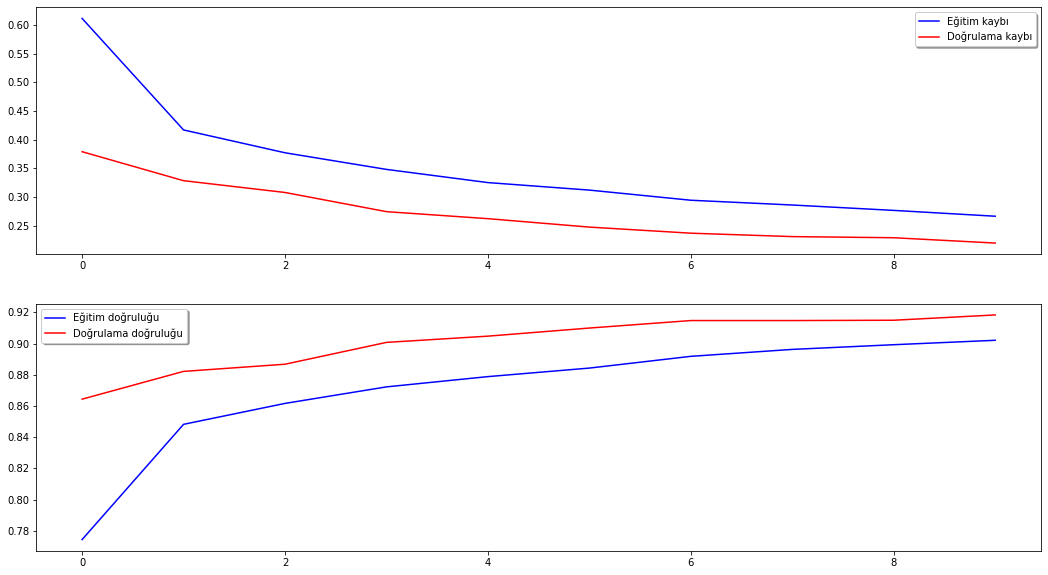

In [ ]:
# Doğrulama ve eğitimle ilgili accuracy ve loss eğrimiz 
goruntu, eksen = plt.subplots(2,1, figsize=(18, 10))
eksen[0].plot(gecmis.history['loss'], color='blue', label="Eğitim kaybı")
eksen[0].plot(gecmis.history['val_loss'], color='red', label="Doğrulama kaybı",axes=eksen[0])
en_iyi = eksen[0].legend(loc='best', shadow=True)

eksen[1].plot(gecmis.history['accuracy'], color='blue', label="Eğitim doğruluğu")
eksen[1].plot(gecmis.history['val_accuracy'], color='red',label="Doğrulama doğruluğu")
en_iyi = eksen[1].legend(loc='best', shadow=True)

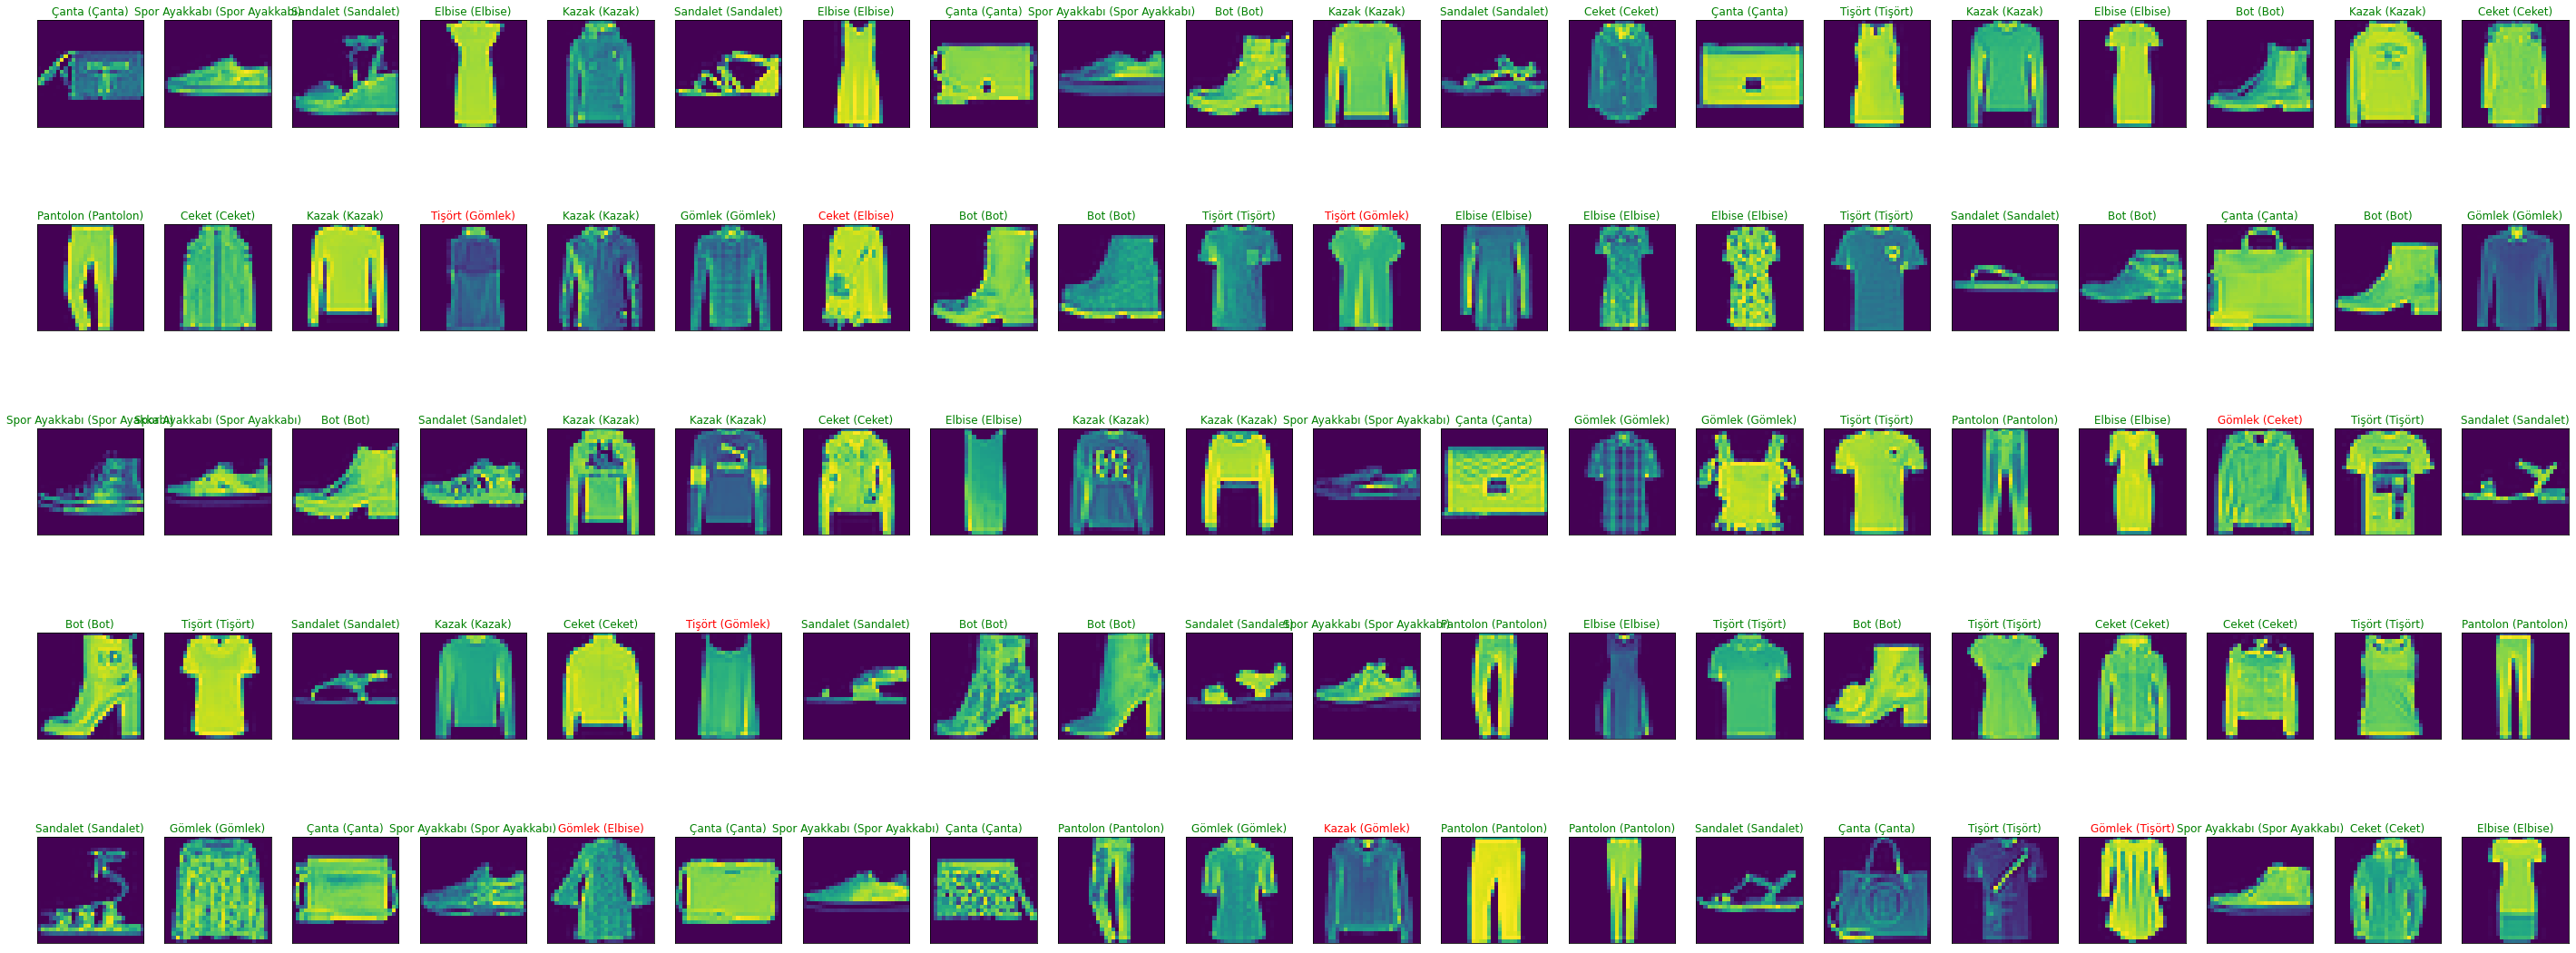

In [ ]:
#tahminle 100 örneği 
tahmin = CNN_modeli.predict(egitim_goruntuleri)
 
#tahmin edilen etiketleri gösterelim
goruntu = plt.figure(figsize=(50, 20))
for i, indeks in enumerate(np.random.choice(egitim_goruntuleri.shape[0], size=100, replace=False)):
    eksen = goruntu.add_subplot(5, 20, i + 1, xticks=[], yticks=[])
    
 # Her resim için uygulayalım
    eksen.imshow(np.squeeze(egitim_goruntuleri[indeks]))
    tahmin_indeksi = np.argmax(tahmin[indeks])
    gercek_indeks = np.argmax(egitim_etiketleri[indeks])
# Her görüntü için başlığı ayarlayalım
    eksen.set_title("{} ({})".format(fashion_mnist_etiketleri[tahmin_indeksi], 
                                  fashion_mnist_etiketleri[gercek_indeks]),
                                  color=("Green" if tahmin_indeksi == gercek_indeks else "Red"))